In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [24]:
with open("realtime-1.csv","rt") as f:
    reader = csv.reader(f)
    my_list = list(reader)

In [9]:
Y_asanas = [x[1] for x in my_list]
Y_pred_asanas = [y[0] for y in my_list]

In [25]:
# code to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm = cm
        #print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
plt.rcParams.update({'font.size': 8})
class_names =['bhujangasana', 'padamasana', 'shavasana', 'tadasana', 'trikonasana', 'vrikshasana']
cnf_matrix = confusion_matrix(Y_asanas, Y_pred_asanas, labels = class_names)

In [13]:
print (cnf_matrix)

[[132   0   3   0   0   0]
 [  0 154   0   0   0   0]
 [  1   0 144   0   1   0]
 [  0   0   0 138   0   0]
 [  0   0   0   0 178   0]
 [  0   0   0   5   0 173]]


In [15]:
# removing none column
cnf_matrix_new = cnf_matrix[:6,:6]
print (cnf_matrix_new)

[[132   0   3   0   0   0]
 [  0 154   0   0   0   0]
 [  1   0 144   0   1   0]
 [  0   0   0 138   0   0]
 [  0   0   0   0 178   0]
 [  0   0   0   5   0 173]]


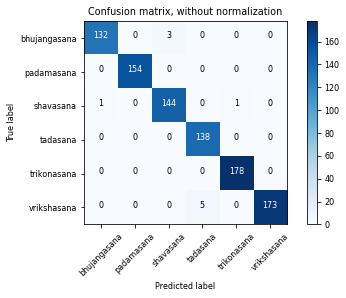

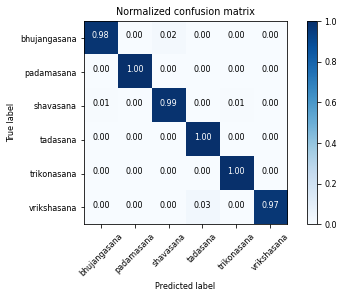

In [16]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_new, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confRealNew.svg')

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('nconfRealNew.svg')

In [29]:
from tkinter.font import _MetricsDict


def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = _MetricsDict.roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

ImportError: cannot import name '_MetricsDict' from 'tkinter.font' (c:\Users\Anubhav Chachra\AppData\Local\Programs\Python\Python310\lib\tkinter\font.py)

In [19]:
correct = 0.0
total = 0.0
for i,row in enumerate(cnf_matrix_new):
    for j, ele in enumerate(row):
        total = total + ele
        if i == j:
            correct = correct + ele
print ("Accuracy is")
print (correct/total*100)

Accuracy is
98.92357373519914


In [28]:
# class wise accuracy
row = cnf_matrix_new[4]
total = sum(row)
print (total)
correct = row[4]
print ("Accuracy is")
print (float(correct/total)*100)

178
Accuracy is
100.0
